# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
import random;
import pandas as pd;
import matplotlib.pyplot as plt;

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
times = 10

# Find the result of rolling a dice 10 times and store it in a dataframe.
def roll_the_dice(times):
    return random.choices(range(1,7), k=times)


dice_results = pd.DataFrame(roll_the_dice(times), columns=['Value'], index= range(1, 11))
dice_results

,Value
1,4
2,2
3,1
4,1
5,4
6,4
7,5
8,6
9,5
10,6


#### 2.- Plot the results sorted by value.

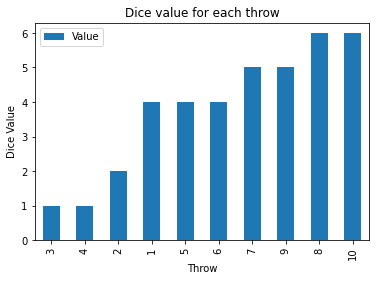

In [3]:
sv=dice_results.sort_values('Value')
sv.plot.bar()
plt.xlabel('Throw')
plt.ylabel('Dice Value')
plt.title('Dice value for each throw')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

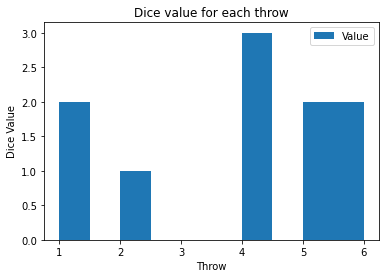

In [4]:
dice_results.plot.hist()
plt.xlabel('Throw');
plt.ylabel('Dice Value');
plt.title('Dice value for each throw');
plt.show()

In [5]:
"""
The first plot show the value of each throw the second shows how many times the player got the value. 
"""

'\nThe first plot show the value of each throw the second shows how many times the player got the value. \n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
def mean(df):
    return df['Value'].sum()/len(df['Value']);


In [7]:
mean (dice_results)

3.8

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
def mean2(df):
    frequency = df['Value'].value_counts().values
    dice_value = df['Value'].value_counts().index
    return sum(dice_value * frequency) / len(df['Value'])


In [9]:
mean2(dice_results)

3.8

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [10]:
def median(df):
    if len(df['Value']) % 2 == 0:
        return (df['Value'][len(df) // 2] + df['Value'][(len(df) // 2) + 1]) / 2
    else:
        return df['Value'][(len(df) // 2) + 1]


In [11]:
median(dice_results)

4.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [27]:
def Qcalcul(df):
    Q2 = median(df)
    index = len(dice_results['Value']) // 2
    
    if len(df['Value']) % 2 == 0:
        lower = df[:index]
        upper = df[index:]
    else:
        lower = df[:index-1]
        upper = df[index+1:]

    Q1 = median(lower)
    Q3 = median(upper)
    return Q1,Q2,Q3


In [26]:
Qcalcul(dice_results)

KeyError: 3

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [77]:
data = pd.read_csv('/Users/dehilinesma/Downloads/Lab_4_Descriptive_Statistics/roll_the_dice_hundred.csv', index_col=0)
data.head()
data.columns = ['Roll', 'Value']
sorted_values=data.sort_values('Value')

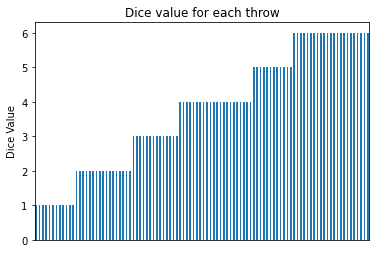

In [78]:

sorted_values['Value'].plot.bar()
plt.xticks([])
plt.ylabel('Dice Value')
plt.title('Dice value for each throw')
plt.show()

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [79]:
mean (data)

3.74

#### 3.- Now, calculate the frequency distribution.


In [80]:
data['Value'].value_counts()


6    23
4    22
2    17
3    14
1    12
5    12
Name: Value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

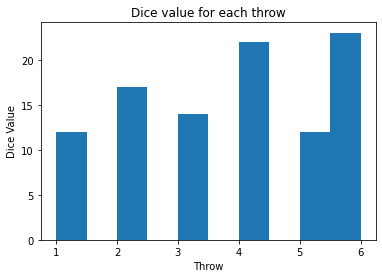

In [84]:
data['Value'].plot.hist()
plt.xlabel('Throw');
plt.ylabel('Dice Value');
plt.title('Dice value for each throw');
plt.show()

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

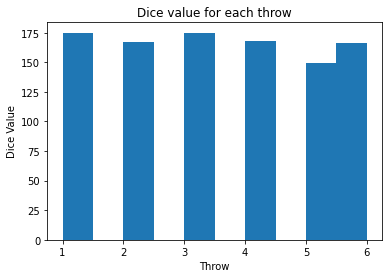

In [89]:
data1 = pd.read_csv('/Users/dehilinesma/Downloads/Lab_4_Descriptive_Statistics/roll_the_dice_thousand.csv', index_col=0)
data1.head()
data1.columns = ['Roll', 'Value']
sorted_values=data.sort_values('Value')
data1['Value'].value_counts()
data1['Value'].plot.hist()
plt.xlabel('Throw');
plt.ylabel('Dice Value');
plt.title('Dice value for each throw');
plt.show()


In [ ]:
"""
the bigger the data the more stable it is. 
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [105]:
data2 = pd.read_csv('/Users/dehilinesma/Downloads/Lab_4_Descriptive_Statistics/ages_population.csv')
data2




,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


<AxesSubplot:ylabel='Frequency'>

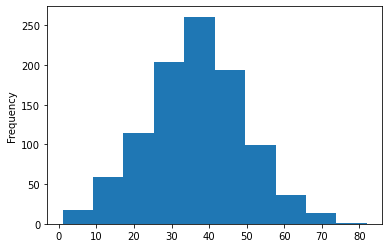

In [112]:
frequency = data2['observation'].value_counts()
data2['observation'].plot.hist()

In [ ]:
#it seems thats we have a normal distribution which means the mean is around 35 and the sd is

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [114]:
data2.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [ ]:
"""
We can deduce from the histogram what values are we expecting 
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

<AxesSubplot:ylabel='Frequency'>

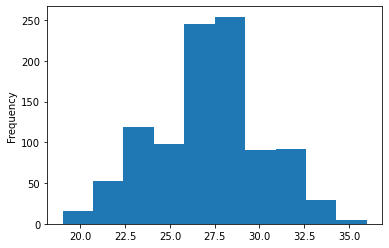

In [119]:
data3 = pd.read_csv('/Users/dehilinesma/Downloads/Lab_4_Descriptive_Statistics/ages_population2.csv')
data3.describe()
frequency = data3['observation'].value_counts()
data3['observation'].plot.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
the mean value should be around 27. people are younger compared to the first data
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [121]:
data3.mean()

observation    27.155
dtype: float64

In [122]:
data3.std()

observation    2.969814
dtype: float64

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

<AxesSubplot:ylabel='Frequency'>

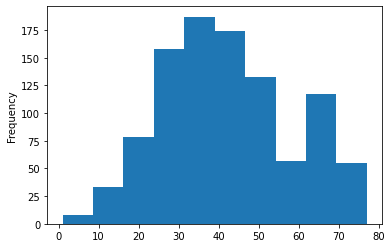

In [125]:
data4 = pd.read_csv('/Users/dehilinesma/Downloads/Lab_4_Descriptive_Statistics/ages_population3.csv')
data4.describe()
frequency = data3['observation'].value_counts()
data4['observation'].plot.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [126]:
data4.mean()

observation    41.989
dtype: float64

In [ ]:
"""
more aged people are in this area 
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [129]:
data4.quantile([0,0.25,0.5,0.75,1])

,observation
0.00,1.0
0.25,30.0
0.50,40.0
0.75,53.0
1.00,77.0


In [ ]:
"""
the mean is not far from the median 
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [134]:
data4.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""